# EDA Covid Vaccinations 

**Dataset source**: [Kaggle](https://www.kaggle.com/gpreda/covid-world-vaccination-progress) and [Github](https://github.com/owid/covid-19-data) repository.

###Import libraries and load the dataframes.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

We are going to use 3 datasets with information about covid vaccinations.
* **df_global**: Contains global data about vaccinations.
* **df_manuf**: Contains separate vaccination data for each vaccine manufacturer.
* **df_cr**: Contains vaccination data for Costa Rica.

In [3]:
df_global = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv') 
df_manuf = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv')
df_cr = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/Costa%20Rica.csv')
df_global.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0


In [ ]:
df_global.shape

(58160, 14)

In [ ]:
df_global.dtypes

location                                object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
total_boosters                         float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
total_boosters_per_hundred             float64
daily_vaccinations_per_million         float64
dtype: object

### Change data type to *datetime*
The data type of column **data** is `object`, we need to change the data type to `datetime` to be able to work with date format and to be able to do visualization.


In [4]:
df_global['date']=pd.to_datetime(df_global['date'])

In [ ]:
df_global.dtypes

location                                       object
iso_code                                       object
date                                   datetime64[ns]
total_vaccinations                            float64
people_vaccinated                             float64
people_fully_vaccinated                       float64
total_boosters                                float64
daily_vaccinations_raw                        float64
daily_vaccinations                            float64
total_vaccinations_per_hundred                float64
people_vaccinated_per_hundred                 float64
people_fully_vaccinated_per_hundred           float64
total_boosters_per_hundred                    float64
daily_vaccinations_per_million                float64
dtype: object

## Exploratory data analysis

#### Total vaccinations per hundred
In the following graph wee can see the number of people vaccinated globally from January 2021 to the present. Data is ***grouped by month*** to make the visualization more user-friendly.

Text(0, 0.5, 'Total Vaccinations')

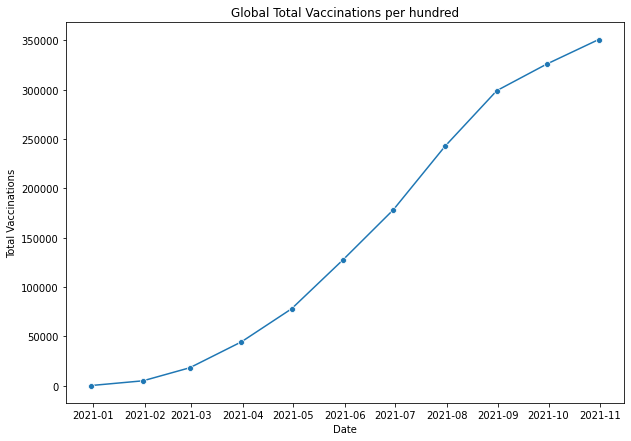

In [5]:
df_global_temp = df_global[df_global['total_vaccinations_per_hundred'].notnull()]
df_global_temp.index=pd.to_datetime(df_global_temp['date'])
example = df_global_temp.groupby(pd.Grouper(freq='M')).total_vaccinations_per_hundred.agg(['sum'])
plt.figure(figsize= (10,7))
sns.lineplot(data=example, x = 'date', y = 'sum', marker='o')
plt.title('Global Total Vaccinations per hundred')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')

#### People fully vaccinated by income
The *upper middle income* has the **highest** percentage of fully vaccinated people, this may be due to the fact that the majority of the working class is within this percentage. On the other hand, people with a low income have an extremely **low** percentage of people fully vaccinated, probably due to inaccessibility to health services.

Text(0.5, 1.0, 'People fully vaccinated by income')

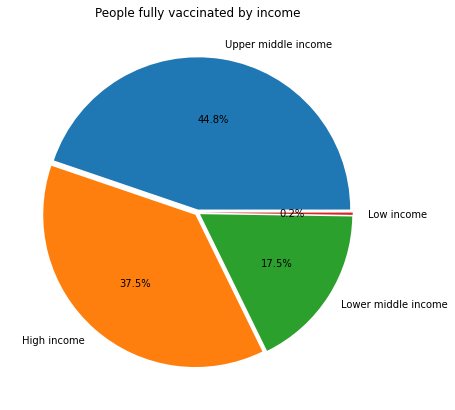

In [6]:
income_df = df_global.groupby('location').people_fully_vaccinated.sum().reset_index().sort_values('people_fully_vaccinated', ascending = False)
ids = income_df.location.str.contains('income', na = False) 
income_df = income_df[ids]
myexplode = [0.02, 0.02, 0.02, 0.02]
plt.figure(figsize = (10,7))
plt.pie(income_df.people_fully_vaccinated, labels=income_df.location, explode=myexplode, autopct = '%.1f%%')
plt.title('People fully vaccinated by income')

#### Top 10 countries with people fully vaccinated
To make this graph, first we have to filter the `iso_code` column to remove all the rows that do not correspond to **countries**, for example, *continents* or *income*. In the plot we can identify **United States** as the leading country in fully vaccinated people. It must be made clear that **China** is the leader in total vaccinations as seen in the second plot.

           location  people_fully_vaccinated
207   United States             3.240870e+10
90            India             2.344351e+10
41            China             7.855875e+09
74          Germany             7.246425e+09
27           Brazil             6.982730e+09
206  United Kingdom             6.968083e+09
69           France             5.498677e+09
199          Turkey             5.414187e+09
97            Italy             5.324123e+09
91        Indonesia             5.265525e+09


Text(0.5, 1.0, 'Top 10 countries with people fully vaccinated')

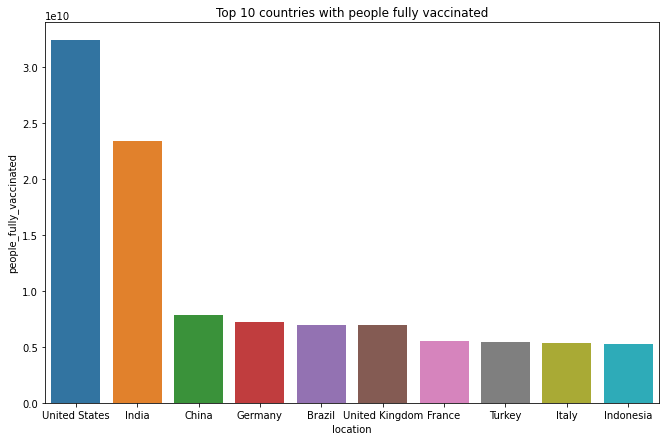

In [21]:
country_df1 =df_global[~df_global.iso_code.str.contains('OWID')]
country_df1 = country_df1.groupby('location').people_fully_vaccinated.sum().reset_index().sort_values('people_fully_vaccinated', ascending=False).head(10)
plt.figure(figsize=(11,7))
print(country_df1)
sns.barplot(data = country_df1, x = 'location', y = 'people_fully_vaccinated')
plt.title('Top 10 countries with people fully vaccinated')

Text(0.5, 1.0, 'Top 10 countries total vaccunations')

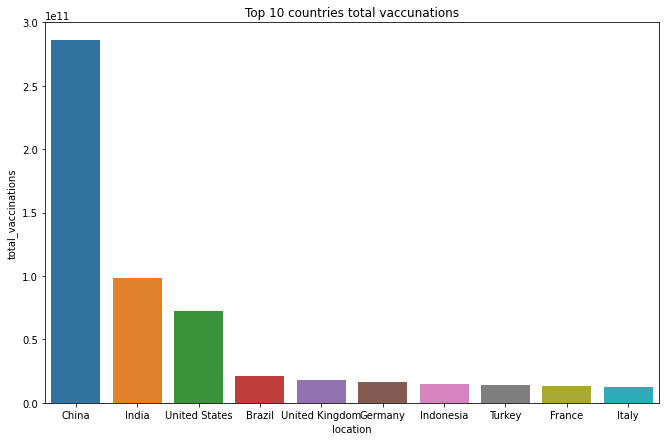

In [22]:
country_df2 =df_global[~df_global.iso_code.str.contains('OWID')]
country_df2 = country_df2.groupby('location').total_vaccinations.sum().reset_index().sort_values('total_vaccinations', ascending=False).head(10)
plt.figure(figsize=(11,7))
sns.barplot(data = country_df2, x = 'location', y = 'total_vaccinations')
plt.title('Top 10 countries total vaccunations')

Text(0.5, 1.0, 'Top 10 countries total vaccunations')

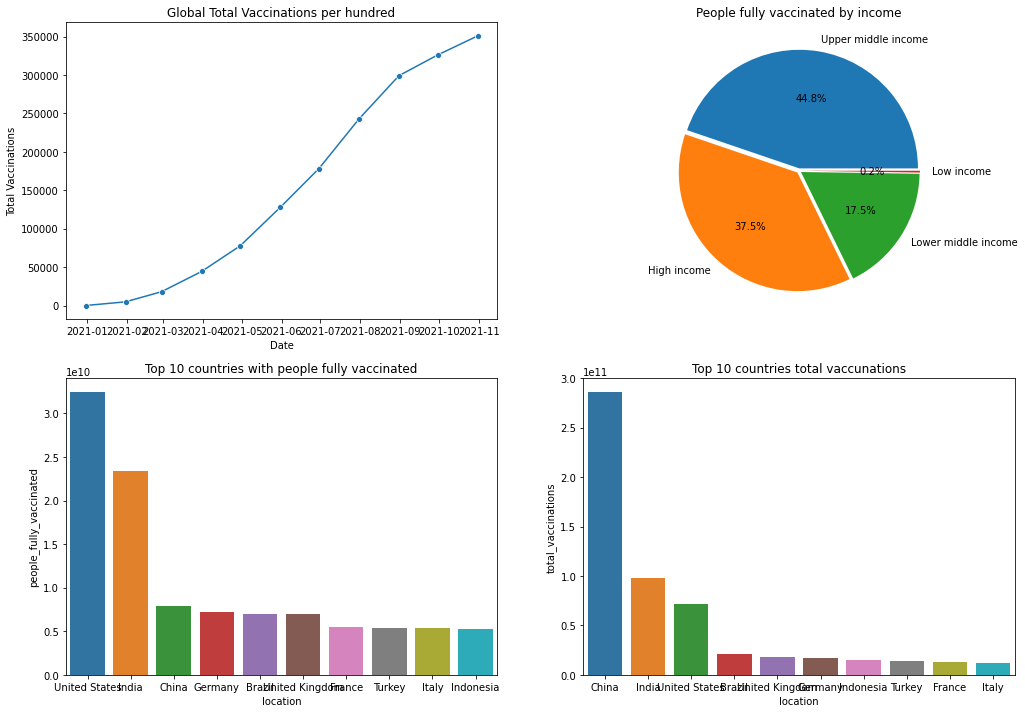

In [23]:
plt.figure(figsize=(17,12))
plt.subplot(2,2,1)
sns.lineplot(data=example, x = 'date', y = 'sum', marker='o')
plt.title('Global Total Vaccinations per hundred')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.subplot(2,2,2)
plt.pie(income_df.people_fully_vaccinated, labels=income_df.location, explode=myexplode, autopct = '%.1f%%')
plt.title('People fully vaccinated by income')
plt.subplot(2,2,3)
sns.barplot(data = country_df1, x = 'location', y = 'people_fully_vaccinated')
plt.title('Top 10 countries with people fully vaccinated')
plt.subplot(2,2,4)
sns.barplot(data = country_df2, x = 'location', y = 'total_vaccinations')
plt.title('Top 10 countries total vaccunations')

###Vaccinations by manufacturer
In the following plots we will analyze the vaccinations separated by manufacturer, we are going to use the `df_manuf` dataset.

In [ ]:
df_manuf.head()

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,31207
4,Austria,2021-01-15,Johnson&Johnson,0


In [ ]:
df_manuf.date = pd.to_datetime(df_manuf.date)

The following chart shows the total vaccinations for each vaccine, there is a noticeable difference in the popularity of the *Pfizer / BioNTech* vaccine.

Text(0.5, 1.0, 'Total vaccinations by Manufacturer')

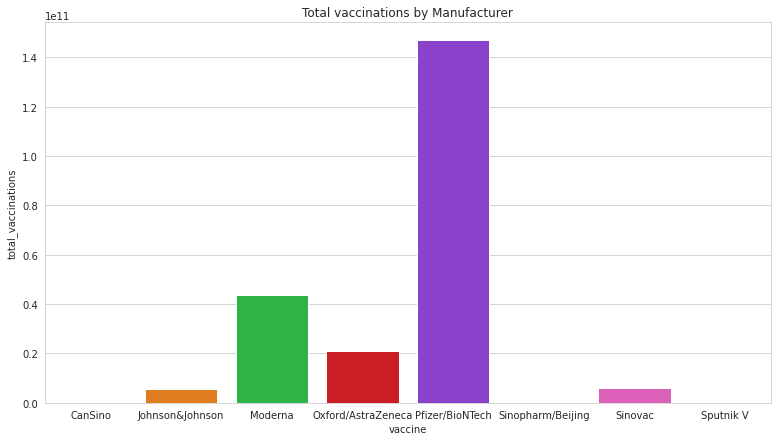

In [ ]:
manuf = df_manuf.groupby('vaccine').total_vaccinations.sum().reset_index()
plt.figure(figsize=(13,7))
sns.set_palette("bright")
sns.barplot(data=manuf, x = 'vaccine', y = 'total_vaccinations')
plt.title('Total vaccinations by Manufacturer')

Let's visualize the popularity of vaccines throughout the year. Between `2021-03` and `2021-05`, the **Pfizer and Moderna** vaccines are very similar in terms of total vaccinations. As of `2021-06`, the **Pfizer** vaccine becomes very popular with respect to the others and this trend continues to this day.

Text(0.5, 1.0, 'Total Vaccinations by Manufacturer')

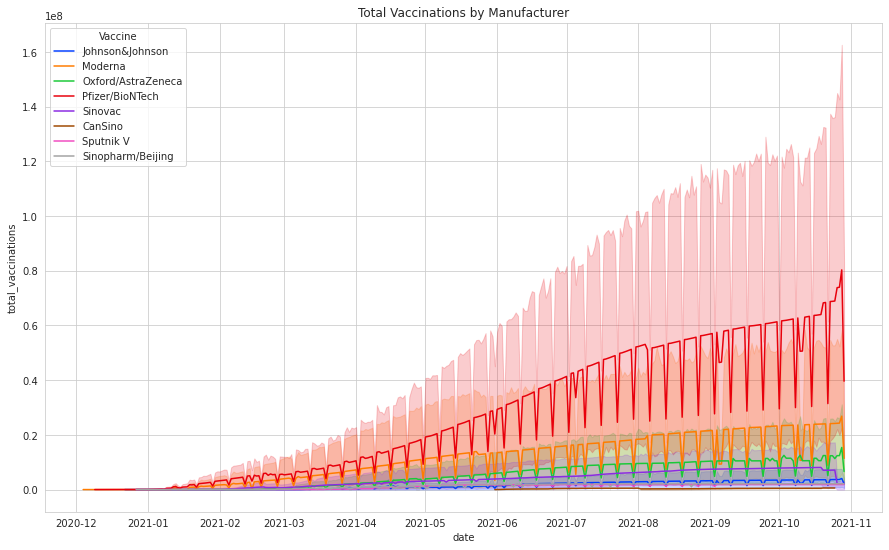

In [ ]:
plt.figure(figsize=(15,9))
sns.lineplot(data=df_manuf, x = 'date', y = 'total_vaccinations', hue='vaccine')
plt.legend(loc='upper left', title='Vaccine')
plt.title('Total Vaccinations by Manufacturer')

### Costa Rica Dataset###
In the next section we have a dataset that contains the total number of people vaccinated in Costa Rica since 12-24-2020 as well as the vaccine brand and the source where the information was taken.

In [ ]:
df_cr.head()

,location,date,vaccine,total_vaccinations,people_vaccinated,people_fully_vaccinated,source_url,total_boosters
0,Costa Rica,2020-12-24,Pfizer/BioNTech,55,55,NaN,https://www.presidencia.go.cr/comunicados/2020...,NaN
1,Costa Rica,2021-01-03,Pfizer/BioNTech,2455,2455,NaN,https://www.ccss.sa.cr/noticias/servicios_noti...,NaN
2,Costa Rica,2021-01-08,Pfizer/BioNTech,9751,9751,NaN,https://www.ccss.sa.cr/noticias/servicios_noti...,NaN
3,Costa Rica,2021-01-15,Pfizer/BioNTech,24859,24804,55.0,https://www.ccss.sa.cr/noticias/servicios_noti...,NaN
4,Costa Rica,2021-01-18,Pfizer/BioNTech,29389,29257,132.0,https://www.larepublica.net/noticia/sube-a-293...,NaN


In the next graph we have the progress of the COVID-19 vaccination in Costa Rica. In the x axis are the dates of each register and in the y axis the total number of people vaccinated.

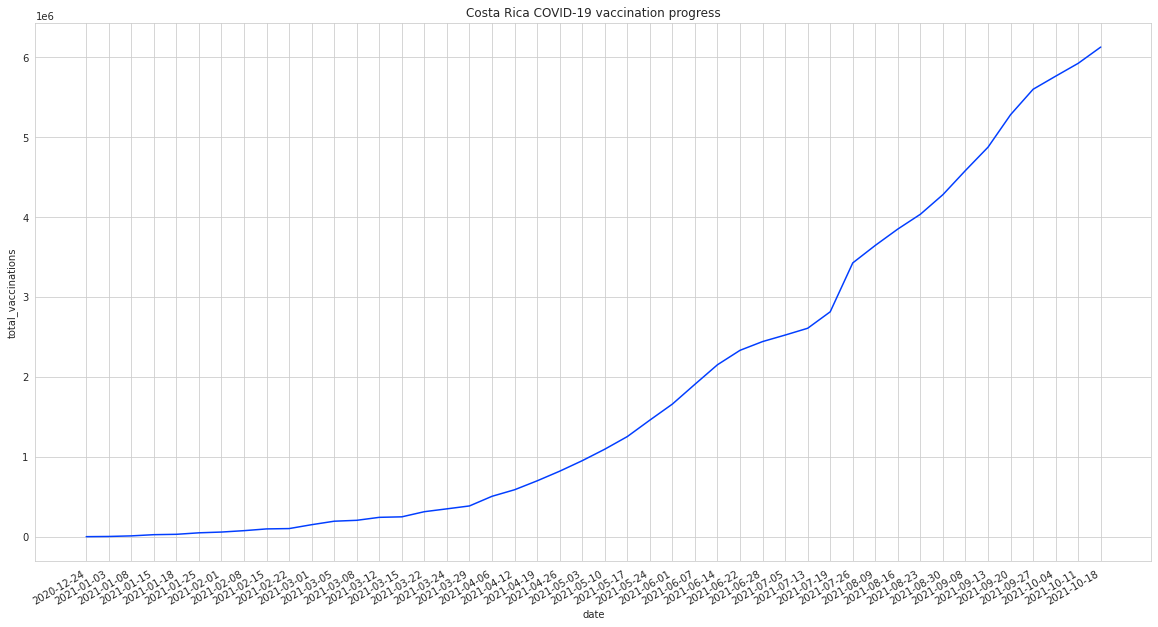

In [ ]:
plt.figure(figsize=(20,11))
cr_full = sns.lineplot(data = df_cr, x = 'date', y = 'total_vaccinations')
cr_full.figure.autofmt_xdate()
plt.title('Costa Rica COVID-19 vaccination progress')
#sns.lineplot(data = df_cr, x = 'date', y = 'people_fully_vaccinated')

The last graph is a scatter plot that give us the information of the cumulative number of people vaccinated in Costa Rica as well as the people that are fully vaccinated. 

As we can see the first five months the percentage of people fully vaccinated was too low but by the end of october, 2021 we got around 70% of the costa ricans that took the vaccine and are fully vaccinated.

Text(0, 0.5, 'People vaccinated')

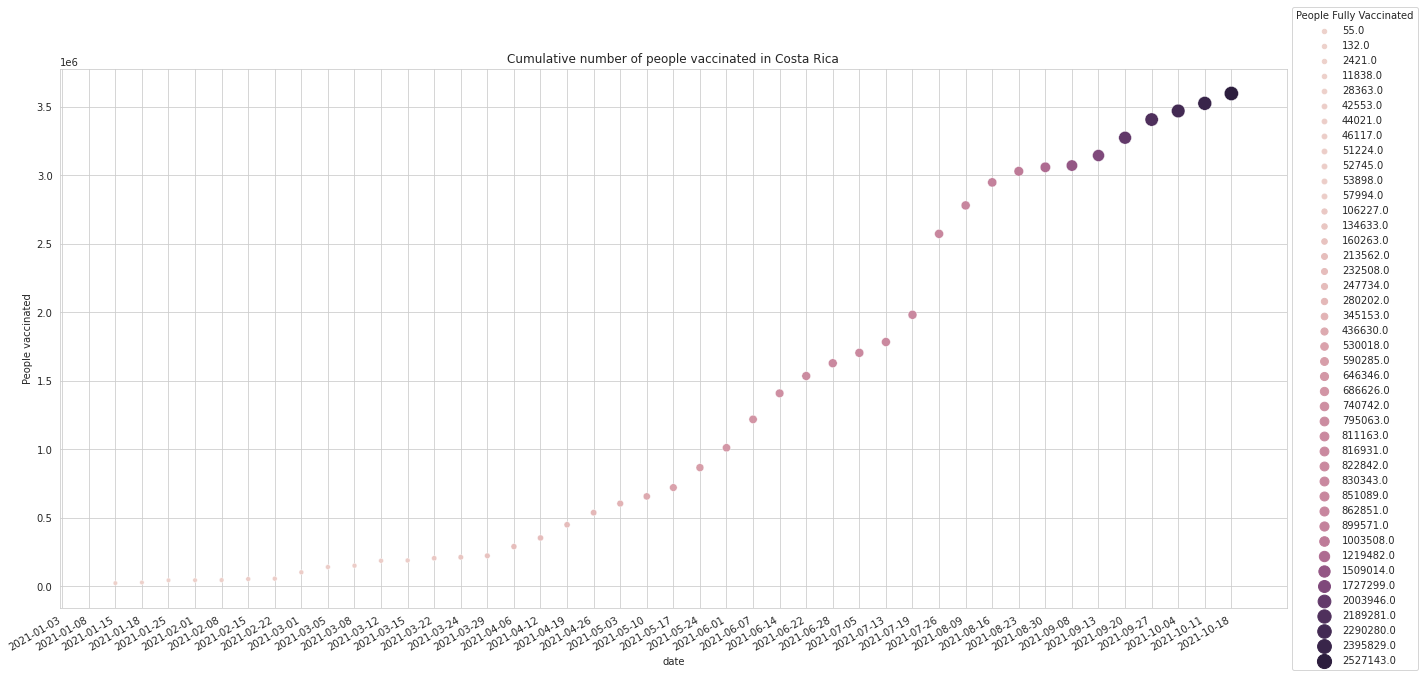

In [ ]:
plt.figure(figsize=(22,11))
cr_1 = sns.scatterplot(x=df_cr.date , y = df_cr.people_vaccinated, hue= df_cr.people_fully_vaccinated, size= df_cr.people_fully_vaccinated, sizes=(20,200), legend='full')
cr_1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, title='People Fully Vaccinated')
sns.set_palette("bright")
cr_1.figure.autofmt_xdate()
sns.set_style("whitegrid")
plt.title('Cumulative number of people vaccinated in Costa Rica')
plt.ylabel('People vaccinated')